# Centroid-Based Clustering: Affinity Propagation

AffinityPropagation creates clusters by sending messages between pairs of samples until convergence. A dataset is then described using a small number of exemplars, which are identified as those most representative of other samples. The messages sent between pairs represent the suitability for one sample to be the exemplar of the other, which is updated in response to the values from other pairs. This updating happens iteratively until convergence, at which point the final exemplars are chosen, and hence the final clustering is given.

Affinity Propagation can be interesting as it chooses the number of clusters based on the data provided. For this purpose, the two important parameters are the preference, which controls how many exemplars are used, and the damping factor which damps the responsibility and availability messages to avoid numerical oscillations when updating these messages.

## Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.cluster import AffinityPropagation

## Load data

In [2]:
# define dataset
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
X[:10]

array([[ 1.22515974, -0.95173116],
       [ 1.01630365, -1.72517506],
       [ 0.33534004, -1.7248955 ],
       [ 1.78634822, -1.78265314],
       [ 1.01675094,  1.06256946],
       [-1.51405201, -1.8110384 ],
       [ 0.84364975, -1.57914694],
       [ 0.65799375,  0.07621282],
       [ 1.24395165,  0.17407616],
       [ 1.34096685,  0.13010495]])

## Explore data

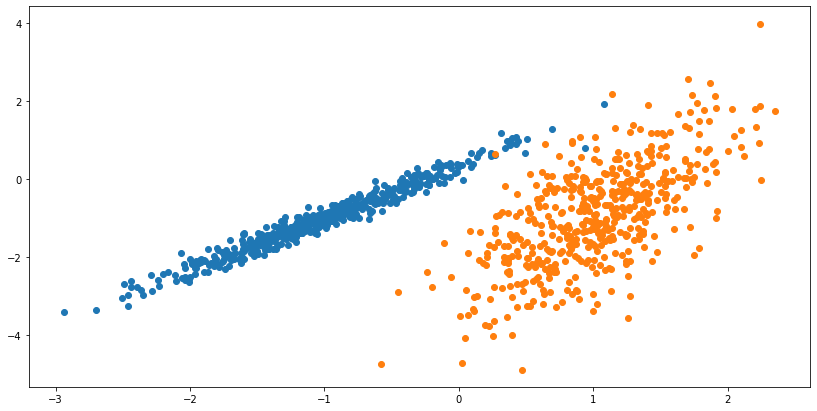

In [3]:
# create scatter plot for samples from each class
plt.figure(figsize=(14,7))

for class_value in range(2):
	# get row indexes for samples with this class
	row_idx = np.where(y == class_value)
	# create scatter of these samples
	plt.scatter(X[row_idx, 0], X[row_idx, 1])
# show the plot
plt.show()

## Train model

In [4]:
# define the model
model = AffinityPropagation(damping=0.9, preference=-1000)
# fit the model
model.fit(X)

AffinityPropagation(affinity='euclidean', convergence_iter=15, copy=True,
                    damping=0.9, max_iter=200, preference=-1000, verbose=False)

## Create clusters

In [5]:
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = np.unique(yhat)

In [6]:
clusters

array([0, 1])

## Plot clusters

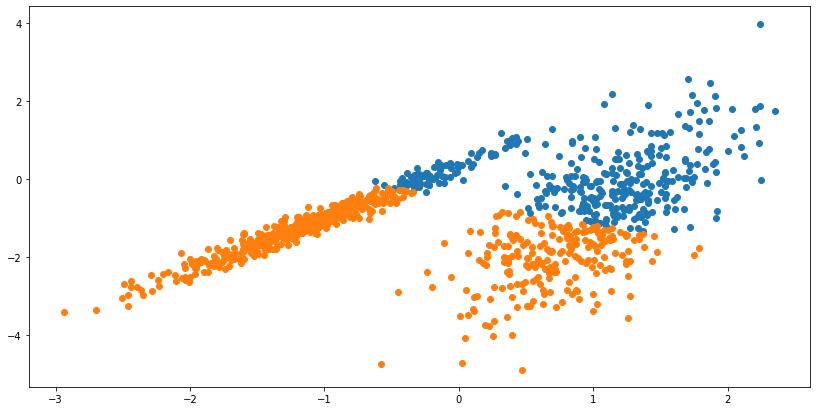

In [7]:
# create scatter plot for samples from each cluster
plt.figure(figsize=(14,7))

for cluster in clusters:
	# get row indexes for samples with this cluster
	row_idx = np.where(yhat == cluster)
	# create scatter of these samples
	plt.scatter(X[row_idx, 0], X[row_idx, 1])
# show the plot
plt.show()